<a href="https://colab.research.google.com/github/motykatomasz/DeepImagePrior/blob/master/DeepImagePrior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Reproducing Deep Image Prior paper
=====================

In this notebook we reproduce Table 1 in Deep Image Prior paper. Although the authors of the paper made the code available online, this is out approach to independently reproduce thair results. 
We developed the code in Jupyter notebook and it is compatible with Google Colab platform to be used with GPU.


## What is Deep Image Prior

In the paper, the authors argue that a great
deal of image statistics are captured by the structure of
a convolutional image generator independent of learning.
What it means is that we can train the generator netowrk on a single degraded image, instead of large dataset of example images,
to reconstruct the image. In this scheme, the network weights serve
as a parametrization of the restored image.


## How does it work?

Lets assume that our image x is under following process:

$ x \Rightarrow Degradation \Rightarrow  \hat{x} \Rightarrow  Restoration \Rightarrow x^{*} $

Our goal is to find $ x^{*}$.
We can do that by finding the MAP estimate of our posterior distribution of clean images:

\begin{equation}
MAP: x^{*} = argmax_{x} p(x|\hat{x})
\end{equation}

As it is usually the case, obtaining posterior distribution $p(x|\hat{x})$ is intractable. We can rewrite the equation using Bayes theorem:

\begin{equation}
p(x|\hat{x}) = \frac{p(\hat{x}|x)p(x)}{p(\hat{x})} \sim p(\hat{x}|x)p(x)
\end{equation}


to be continued...


In [10]:
!pip3 install torch torchvision Pillow
!apt-get update
!apt-get install subversion
!svn checkout https://github.com/DmitryUlyanov/deep-image-prior/trunk/data

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
subvers

In [14]:
ls data/

denoising/          imagenet1000_clsid_to_human.txt  sr/
feature_inversion/  inpainting/                      teaser_compiled.jpg
flash_no_flash/     restoration/


In [0]:
import torch as tr
import matplotlib.pyplot as plt
from PIL import Image

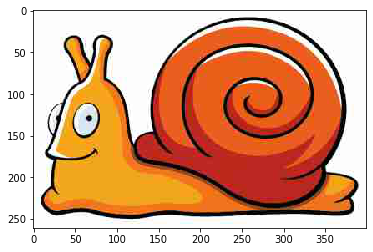

In [13]:
img = Image.open("data/denoising/snail.jpg")
plt.imshow(img)